In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

In [3]:
dataset = pd.read_csv('https://a.uguu.se/ww2QTIMwhWTq_Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
X = dataset.iloc[:, [2,3]].values
Y = dataset.iloc[:, 4].values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [6]:
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler()
X_train = x_scaler.fit_transform(X_train)
X_test = x_scaler.transform(X_test)

/home/jin/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jin/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jin/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
from sklearn.svm import SVC
classifier = SVC(kernel="linear")
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)

In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
cm

array([[66,  2],
       [ 8, 24]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


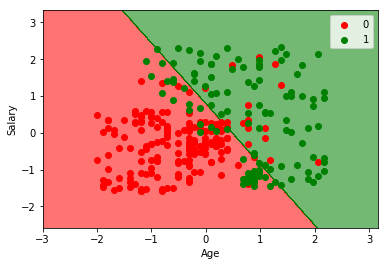

In [12]:
from matplotlib.colors import ListedColormap
X_set, Y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(min(X_set[:,0])-1,max(X_set[:,0])+1,0.01), 
                     np.arange(min(X_set[:,1])-1,max(X_set[:,1])+1,0.01))
plot.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.55, cmap=ListedColormap(('red','green')))
for i, j in enumerate(np.unique(Y_set)):
    plot.scatter(X_set[Y_set==j,0], X_set[Y_set==j,1],c=ListedColormap(('red', 'green'))(i),label=j)
plot.legend()
plot.xlabel('Age')
plot.ylabel('Salary')
plot.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


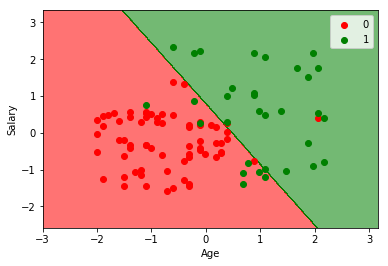

In [13]:
from matplotlib.colors import ListedColormap
X_set, Y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(min(X_set[:,0])-1,max(X_set[:,0])+1,0.01), 
                     np.arange(min(X_set[:,1])-1,max(X_set[:,1])+1,0.01))
plot.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.55, cmap=ListedColormap(('red','green')))
for i, j in enumerate(np.unique(Y_set)):
    plot.scatter(X_set[Y_set==j,0], X_set[Y_set==j,1],c=ListedColormap(('red', 'green'))(i),label=j)
plot.legend()
plot.xlabel('Age')
plot.ylabel('Salary')
plot.show()